In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df= pd.read_csv('Airbnb_Madrid_SinNulos.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20751 entries, 0 to 20750
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      20751 non-null  int64  
 1   id                              20751 non-null  int64  
 2   nombre                          20751 non-null  object 
 3   descripcion                     20751 non-null  object 
 4   id_anfitrion                    20751 non-null  int64  
 5   nombre_anfitrion                20751 non-null  object 
 6   anfitrion_desde                 20751 non-null  object 
 7   ubicacion_anfitrion             20751 non-null  object 
 8   tiempo_respuesta_anfitrion      20751 non-null  object 
 9   tasa_respuesta_anfitrion        20751 non-null  float64
 10  tasa_aceptacion_anfitrion       20751 non-null  float64
 11  es_superanfitrion               20751 non-null  object 
 12  anuncios_activos_anfitrion      

In [28]:
valores_nulos=df.isnull().sum()
valores_nulos

Unnamed: 0                        0
id                                0
nombre                            0
descripcion                       0
id_anfitrion                      0
nombre_anfitrion                  0
anfitrion_desde                   0
ubicacion_anfitrion               0
tiempo_respuesta_anfitrion        0
tasa_respuesta_anfitrion          0
tasa_aceptacion_anfitrion         0
es_superanfitrion                 0
anuncios_activos_anfitrion        0
total_anuncios_anfitrion          0
verificaciones_anfitrion          0
anfitrion_tiene_foto              0
identidad_anfitrion_verificada    0
barrio                            0
distrito                          0
latitud                           0
longitud                          0
tipo_propiedad                    0
tipo_habitacion                   0
capacidad                         0
banos                             0
habitaciones                      0
camas                             0
amenidades                  

In [29]:
# --- columnas objetivo para manejo de outliers ---
CuantisOut = [
    "anuncios_activos_anfitrion", "total_anuncios_anfitrion",
    "capacidad", "banos", "habitaciones", "camas",
    "precio",
    "noches_minimas", "noches_maximas", "promedio_min_noches", "promedio_max_noches",
    "num_resenas", "num_resenas_12m", "num_resenas_30d", "num_resenas_1y",
    "ingresos_estimados_365d"
]

# Separación segura:
cuantis = df[CuantisOut].copy()                         # solo columnas a tratar outliers
otros   = df.drop(columns=CualisOut, errors="ignore")  # TODO lo demás (cualis + numéricas no tratadas)


<Figure size 1500x800 with 0 Axes>

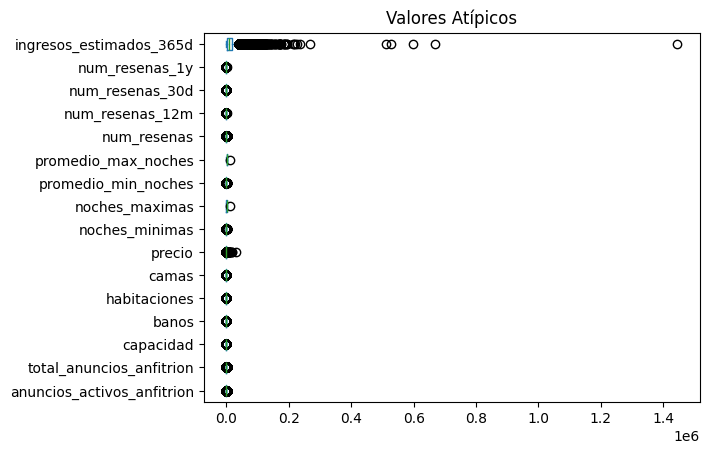

In [30]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantis.plot(kind='box', vert=False)
plt.title("Valores Atípicos")
plt.show() #dibujamos el diagrama

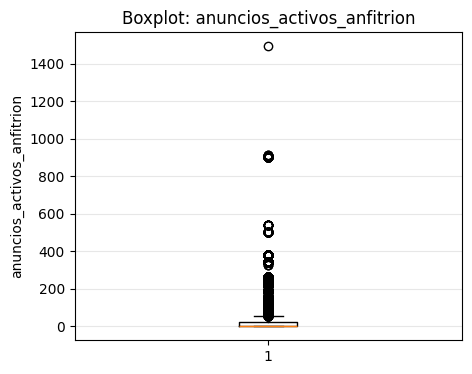

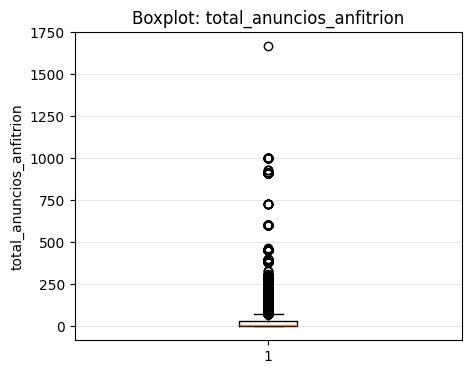

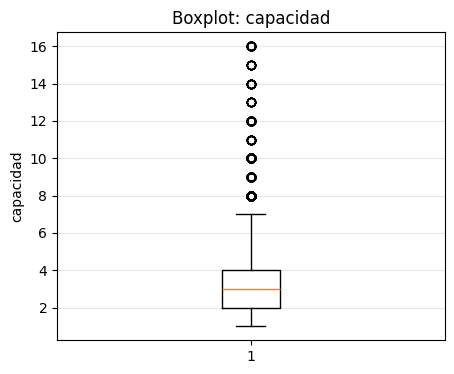

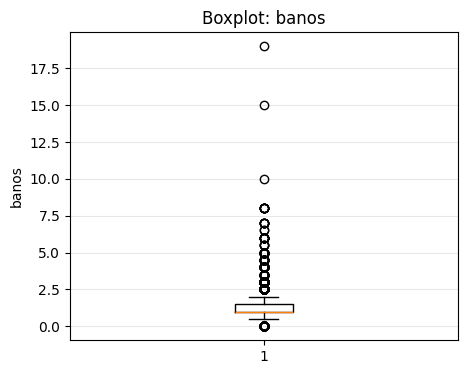

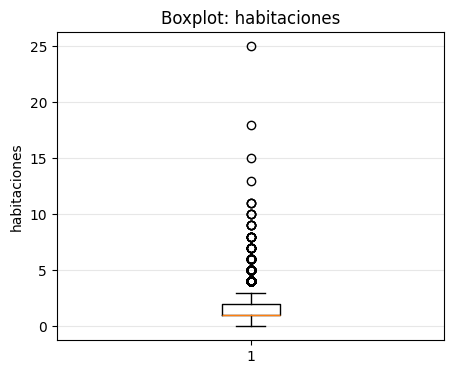

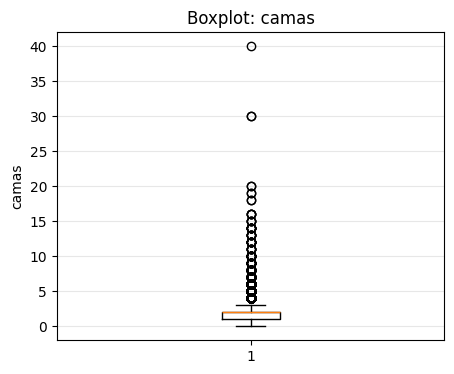

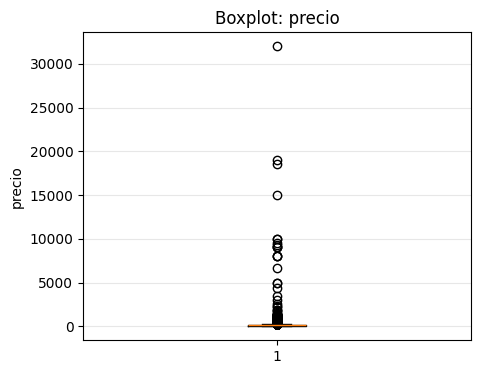

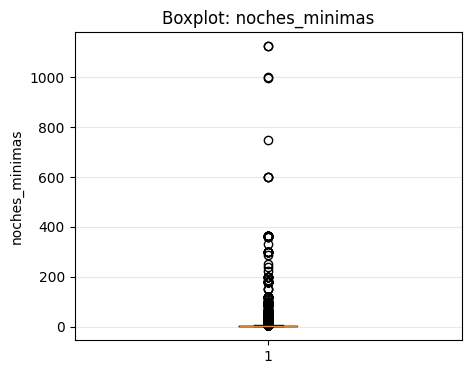

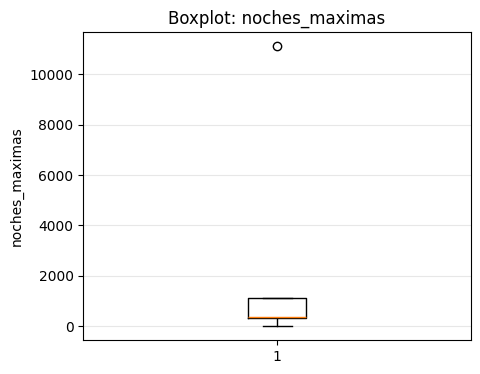

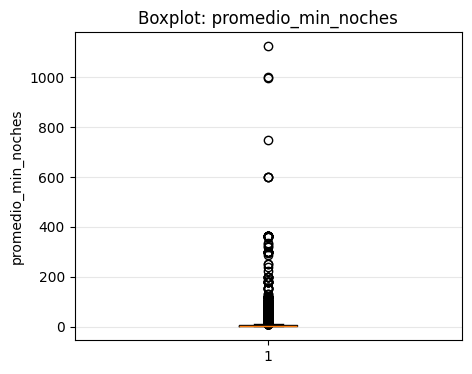

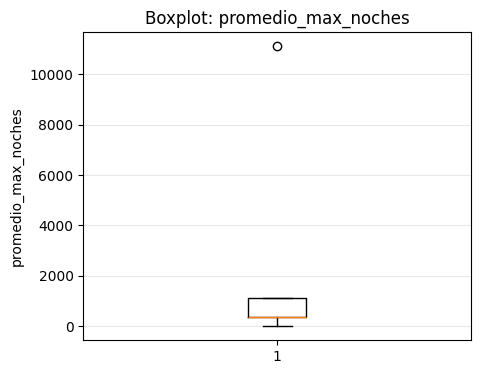

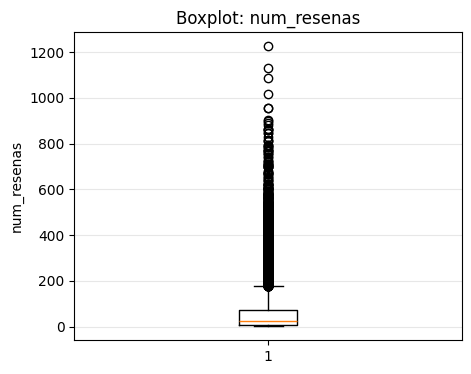

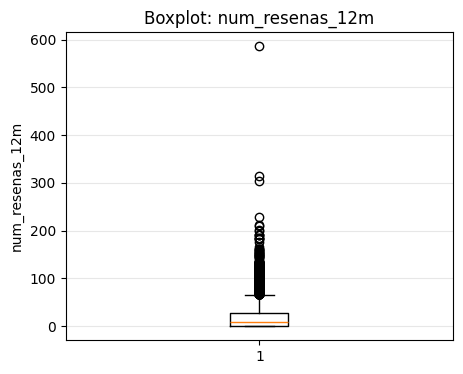

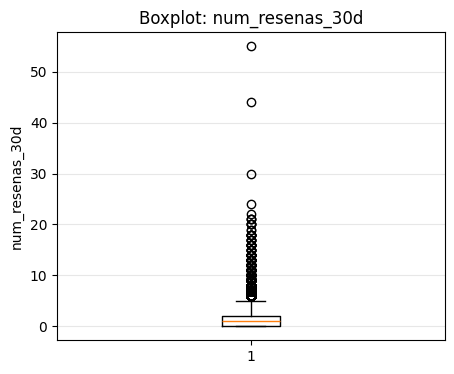

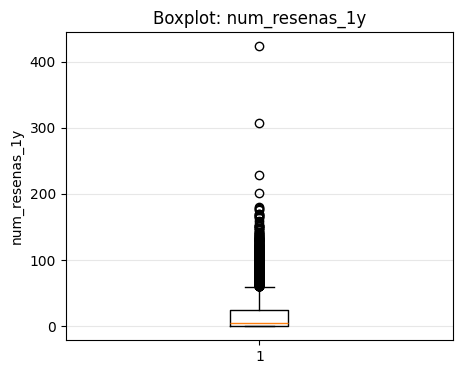

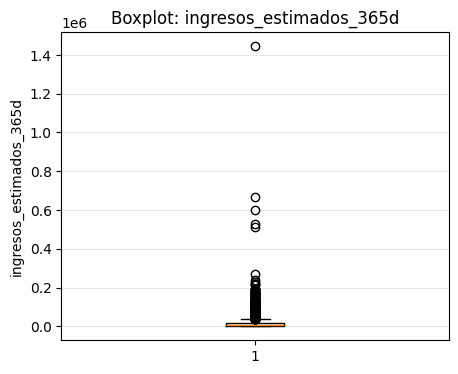

In [31]:
# Boxplot individual por variable
for c in cols_outliers:
    s = pd.to_numeric(df[c], errors="coerce").dropna()
    plt.figure(figsize=(5, 4))
    plt.boxplot(s, vert=True, showfliers=True)
    plt.title(f"Boxplot: {c}")
    plt.ylabel(c)
    plt.grid(axis="y", alpha=0.3)
    plt.show()








"DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS 

In [32]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantis
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido anuncios_activos_anfitrion      382.269493
total_anuncios_anfitrion        432.486454
capacidad                         8.959066
banos                             3.117073
habitaciones                      4.103903
camas                             6.161442
precio                         1282.873287
noches_minimas                   83.887858
noches_maximas                 1794.501057
promedio_min_noches              82.737831
promedio_max_noches            1974.277166
num_resenas                     358.292538
num_resenas_12m                  88.433914
num_resenas_30d                   8.410667
num_resenas_1y                   85.430835
ingresos_estimados_365d       76500.545000
dtype: float64
Limite inferior permitido anuncios_activos_anfitrion     -295.297780
total_anuncios_anfitrion       -328.041174
capacidad                        -2.536050
banos                            -0.580135
habitaciones                     -1.354156
camas                         

In [33]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df2= cuantis[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df2

,anuncios_activos_anfitrion,total_anuncios_anfitrion,capacidad,banos,habitaciones,camas,precio,noches_minimas,noches_maximas,promedio_min_noches,promedio_max_noches,num_resenas,num_resenas_12m,num_resenas_30d,num_resenas_1y,ingresos_estimados_365d
0,2.0,2.0,1.0,1.0,1.0,1.0,29.0,4.0,40.0,4.0,40.0,33.0,0.0,0.0,0.0,0.0
1,3.0,6.0,2.0,1.0,1.0,1.0,135.0,5.0,50.0,5.1,50.0,172.0,0.0,0.0,0.0,17595.0
2,1.0,4.0,2.0,1.0,1.0,1.0,135.0,3.0,730.0,3.0,730.0,8.0,0.0,0.0,0.0,17595.0
3,3.0,6.0,2.0,1.0,1.0,1.0,135.0,5.0,50.0,5.0,50.0,49.0,0.0,0.0,0.0,17595.0
4,3.0,3.0,4.0,1.5,1.0,2.0,64.0,1.0,30.0,1.0,30.0,234.0,34.0,2.0,45.0,13056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20746,1.0,1.0,2.0,1.0,1.0,1.0,78.0,2.0,365.0,2.0,365.0,1.0,1.0,1.0,0.0,468.0
20747,14.0,14.0,4.0,1.0,1.0,2.0,146.0,7.0,365.0,7.2,365.0,2.0,2.0,2.0,0.0,4088.0
20748,1.0,1.0,2.0,1.0,1.0,1.0,88.0,1.0,365.0,1.0,365.0,1.0,1.0,1.0,0.0,528.0
20749,1.0,1.0,4.0,1.0,2.0,1.0,92.0,4.0,15.0,4.0,15.0,2.0,2.0,2.0,0.0,1472.0


In [34]:
valoresnulos=df2.isnull().sum()
valoresnulos

anuncios_activos_anfitrion    536
total_anuncios_anfitrion      537
capacidad                     295
banos                         238
habitaciones                  191
camas                         233
precio                         32
noches_minimas                236
noches_maximas                  1
promedio_min_noches           218
promedio_max_noches             1
num_resenas                   504
num_resenas_12m               340
num_resenas_30d               315
num_resenas_1y                373
ingresos_estimados_365d       218
dtype: int64

In [35]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
dfclean=df2.copy()
dfclean=dfclean.fillna(round(df2.mean(),1))
dfclean

,anuncios_activos_anfitrion,total_anuncios_anfitrion,capacidad,banos,habitaciones,camas,precio,noches_minimas,noches_maximas,promedio_min_noches,promedio_max_noches,num_resenas,num_resenas_12m,num_resenas_30d,num_resenas_1y,ingresos_estimados_365d
0,2.0,2.0,1.0,1.0,1.0,1.0,29.0,4.0,40.0,4.0,40.0,33.0,0.0,0.0,0.0,0.0
1,3.0,6.0,2.0,1.0,1.0,1.0,135.0,5.0,50.0,5.1,50.0,172.0,0.0,0.0,0.0,17595.0
2,1.0,4.0,2.0,1.0,1.0,1.0,135.0,3.0,730.0,3.0,730.0,8.0,0.0,0.0,0.0,17595.0
3,3.0,6.0,2.0,1.0,1.0,1.0,135.0,5.0,50.0,5.0,50.0,49.0,0.0,0.0,0.0,17595.0
4,3.0,3.0,4.0,1.5,1.0,2.0,64.0,1.0,30.0,1.0,30.0,234.0,34.0,2.0,45.0,13056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20746,1.0,1.0,2.0,1.0,1.0,1.0,78.0,2.0,365.0,2.0,365.0,1.0,1.0,1.0,0.0,468.0
20747,14.0,14.0,4.0,1.0,1.0,2.0,146.0,7.0,365.0,7.2,365.0,2.0,2.0,2.0,0.0,4088.0
20748,1.0,1.0,2.0,1.0,1.0,1.0,88.0,1.0,365.0,1.0,365.0,1.0,1.0,1.0,0.0,528.0
20749,1.0,1.0,4.0,1.0,2.0,1.0,92.0,4.0,15.0,4.0,15.0,2.0,2.0,2.0,0.0,1472.0


In [36]:
valoresnulos=dfclean.isnull().sum()
valoresnulos

anuncios_activos_anfitrion    0
total_anuncios_anfitrion      0
capacidad                     0
banos                         0
habitaciones                  0
camas                         0
precio                        0
noches_minimas                0
noches_maximas                0
promedio_min_noches           0
promedio_max_noches           0
num_resenas                   0
num_resenas_12m               0
num_resenas_30d               0
num_resenas_1y                0
ingresos_estimados_365d       0
dtype: int64

In [37]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([otros, dfclean], axis=1)
Datos_limpios

,Unnamed: 0,id,nombre,descripcion,id_anfitrion,nombre_anfitrion,anfitrion_desde,ubicacion_anfitrion,tiempo_respuesta_anfitrion,tasa_respuesta_anfitrion,...,precio,noches_minimas,noches_maximas,promedio_min_noches,promedio_max_noches,num_resenas,num_resenas_12m,num_resenas_30d,num_resenas_1y,ingresos_estimados_365d
0,0,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,Abdel,2010-02-21,"Madrid, Spain",Desconocida,93.876938,...,29.0,4.0,40.0,4.0,40.0,33.0,0.0,0.0,0.0,0.0
1,1,30320,Apartamentos Dana Sol,Sin descripción,130907,Dana,2010-05-24,"Madrid, Spain",Desconocida,93.876938,...,135.0,5.0,50.0,5.1,50.0,172.0,0.0,0.0,0.0,17595.0
2,2,30959,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,132883,Angela,2010-05-26,"Madrid, Spain",Desconocida,93.876938,...,135.0,3.0,730.0,3.0,730.0,8.0,0.0,0.0,0.0,17595.0
3,3,40916,Apartasol Apartamentos Dana,Sin descripción,130907,Dana,2010-05-24,"Madrid, Spain",Desconocida,93.876938,...,135.0,5.0,50.0,5.0,50.0,49.0,0.0,0.0,0.0,17595.0
4,4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,303845,Arturo,2010-11-29,"Madrid, Spain",within an hour,100.000000,...,64.0,1.0,30.0,1.0,30.0,234.0,34.0,2.0,45.0,13056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20746,25970,1439688869048233335,Loft chic con patio soleado,Wake up in the heart of Madrid in a cozy apart...,700220526,Fernando Cesar,2025-06-09,No reportada,Desconocida,93.876938,...,78.0,2.0,365.0,2.0,365.0,1.0,1.0,1.0,0.0,468.0
20747,25971,1439750796168476506,Apartamento con piscina y garaje,Beautiful loft fully equipped with everything ...,34350904,Antonio,2015-05-27,"Madrid, Spain",within an hour,100.000000,...,146.0,7.0,365.0,7.2,365.0,2.0,2.0,2.0,0.0,4088.0
20748,25975,1441028226979579527,Moderna habitacion en malasaña,The whole group will enjoy easy access to ever...,675465242,Maria,2025-01-27,No reportada,within a few hours,88.000000,...,88.0,1.0,365.0,1.0,365.0,1.0,1.0,1.0,0.0,528.0
20749,25976,1439766040209286381,Stylish 2 bdr Cuatro Caminos,Enjoy a stylish experience at this centrally-l...,700241910,Genesis,2025-06-09,No reportada,Desconocida,93.876938,...,92.0,4.0,15.0,4.0,15.0,2.0,2.0,2.0,0.0,1472.0


In [39]:
valoresnulos=Datos_limpios.isnull().sum()
valoresnulos

Unnamed: 0                        0
id                                0
nombre                            0
descripcion                       0
id_anfitrion                      0
nombre_anfitrion                  0
anfitrion_desde                   0
ubicacion_anfitrion               0
tiempo_respuesta_anfitrion        0
tasa_respuesta_anfitrion          0
tasa_aceptacion_anfitrion         0
es_superanfitrion                 0
verificaciones_anfitrion          0
anfitrion_tiene_foto              0
identidad_anfitrion_verificada    0
barrio                            0
distrito                          0
latitud                           0
longitud                          0
tipo_propiedad                    0
tipo_habitacion                   0
amenidades                        0
disponibilidad                    0
disponibilidad_30d                0
disponibilidad_60d                0
disponibilidad_90d                0
disponibilidad_365d               0
ocupacion_estimada_365d     

In [40]:
Datos_limpios.to_csv('Airbnb_Madrid_Limpio.csv')